In [8]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf


In [9]:
stock_data = yf.download('AAPL', start='2023-01-01')
stock_data.head(10)


/tmp/ipython-input-2484846693.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download('AAPL', start='2023-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-01-03,123.470612,129.226052,122.582119,128.613985,112117500
2023-01-04,124.744118,127.014709,123.480487,125.267339,89113600
2023-01-05,123.421265,126.136098,123.164595,125.504283,80962700
2023-01-06,127.962410,128.623840,123.292902,124.398582,87754700
2023-01-09,128.485657,131.703978,128.228987,128.801572,70790800
2023-01-10,129.058212,129.581433,126.481589,128.594221,63896200
2023-01-11,131.782928,131.802662,128.791677,129.571568,69458900
2023-01-12,131.703949,132.543070,129.759140,132.167940,71379600


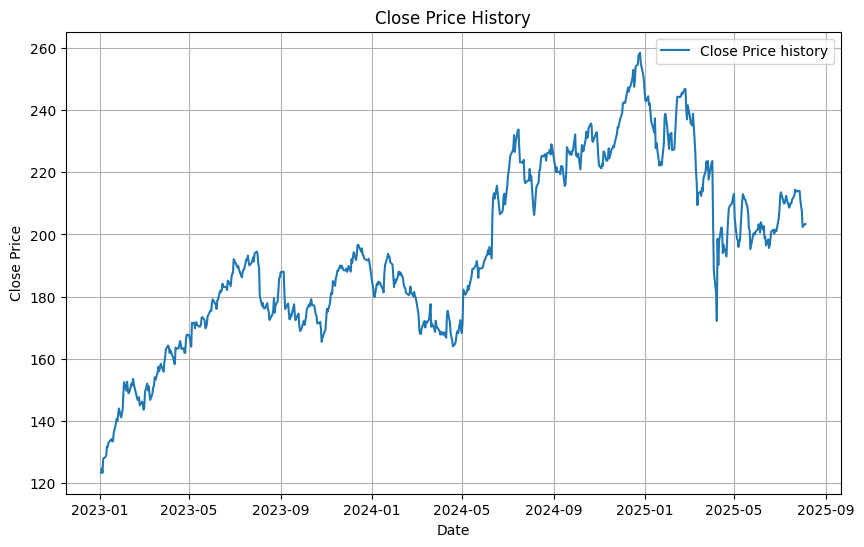

In [10]:
plt.figure(figsize=(10,6))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price history')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

## MA (Moving Average) Model

In [11]:


## making the data stationary before model fitting
apple_price_stationary = stock_data['Close'].diff().dropna()

# Split the data into training and testing datasets
train_data, test_data  = apple_price_stationary[:-30],  apple_price_stationary[-30:]

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


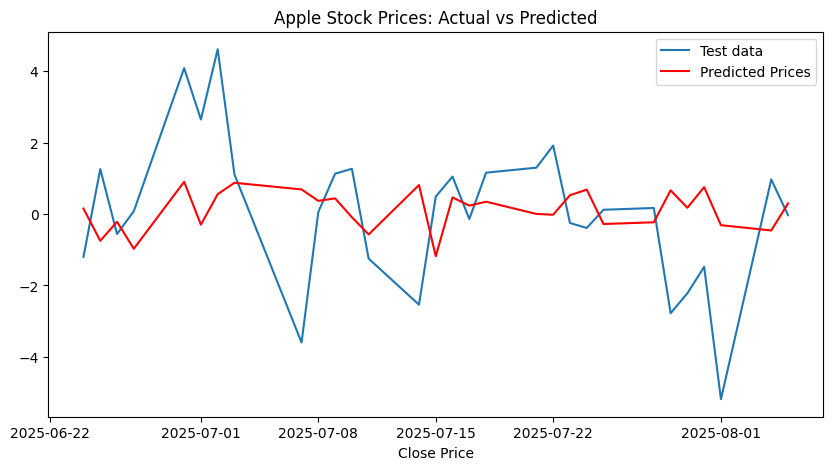

RMSE:  2.12


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

## fitting the moving average Model (MA) to the training data
model = ARIMA(train_data, order=(0,0,30))  ## this is the moving average MA (model) with p,d = 0 and q=30...that's how we define moving average model using ARIMA
model_fit = model.fit()

## make predications on the test data
predictions = model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data)-1,
    dynamic=False
)


## plotting the actual vs predicted values
plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color='red', label='Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')  ## ran the cell before
plt.legend()
plt.show()


## evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE: ', rmse)



### rmse: is low

-  end here!